## Week 4 Homework

#### Skim and read all questions to focus your attention on the problems required.
The problems should start off easy and then progressively get more difficult. Don't be discouraged if you're unsure how to solve something. Try your best and don't be afraid to Google. We'll cover any questions in the following class.

> **Note:** Don't forget to press `shift + enter` on ALL cells with code in them

1. Import `pandas`, `matplotlib` and `seaborn` in the cell below and set them to their appropriate alias.

In [1]:
# your imports here


### Simple Visualizations

To get warmed up, we'll generate some random data to work with. Run the codes in the cells below without altering them.

In [1]:
# run this cell; you can comment this whole cell out after
!pip install names  
# if you've already run this cell once, comment this whole line out or delete this cell

In [3]:
# run this cell
import numpy as np
import names  #this is a custom library designed specifically for generating random names
from datetime import datetime

> **Note:** If the above import doesn't work, click on the `Kernel` menu and select `Restart`. Re-run your previous cell of import statements along with the cell above.

In [4]:
# run this cell
rng = np.random.default_rng(12345)
hours_worked = rng.integers(1, 50, 10)
hours_worked

array([35, 12, 39, 16, 11, 40, 32, 34, 49, 20], dtype=int64)

In [5]:
# run this cell
employees = []
for x in range(0,10):
    employees.append(names.get_first_name())
    
employees

['Joshua',
 'Mary',
 'Carl',
 'Frances',
 'Marcella',
 'Wanda',
 'Loretta',
 'Christine',
 'Kerry',
 'Harry']

2. The above code should have generated the `hours_worked` and `employees` lists with random information. Use both of those lists to plot a bar graph with matplotlib showing the amount of hours each person worked.

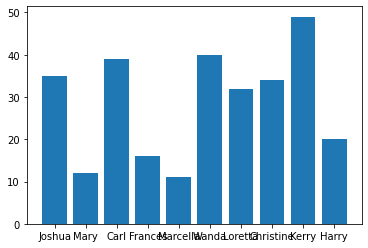

In [6]:
# your plot here


3. Make the same plot but add proper labels to the x and y axis. Give the plot an appropriate title of your choosing.
**Bonus** Rotate the names on the x-axis so that they're more legible

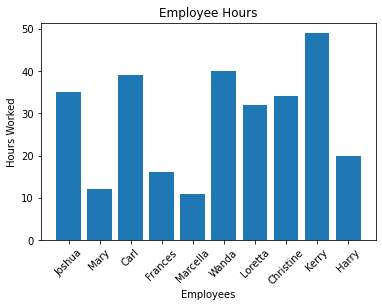

In [7]:
# your plot here


Lets generate some random data on employee ages and their salaries.

In [8]:
# run this cell
ages = rng.normal(35, 6, 80)
salaries = rng.normal(75000, 35000, 80)

4. Create a scatterplot of the employees `Ages` and `Salaries`. Add appropriate labels and titles.

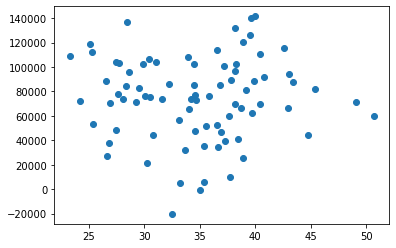

5. A keen eye will notice that the random generator used was for a normal distribution of data. If you're not sure what this means, that's okay, but next we'll create a histogram of the `salaries` for a visual confirmation of a normal distribution.

> **Note:** Results may vary due to randomness and the data may not be perfectly distributed but should be mostly normal with possible outliers.

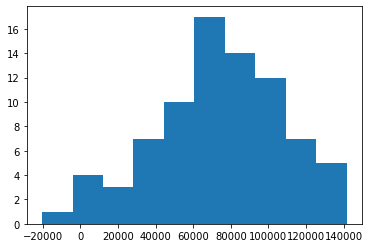

In [10]:
# Create your salaries histogram here


6. How many bins are being used by the histogram? What is a bin?

7. Create another histogram but use 15 bins instead of the default. Appropriately label and title the plot.

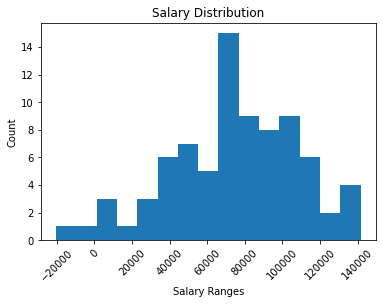

### Plotting with Pandas

Next we'll generate a full random dataframe for our employees and their work history.

In [12]:
# run this cell
columns = ['Employee', 'Date', 'Day_of_week', 'Hours_worked', 'Wages', 'Tips']
dates = pd.date_range(end = '4/1/2022', periods = 500).to_pydatetime().tolist()
data = []
employee_probs = [0.002, .116, 0.009, .085, .025, .234, .159, .06, .19, .12]

for date in dates:
    rand_employees = rng.choice(employees, rng.choice([6,8,9,10], p = [0.2, 0.3, 0.4, 0.1]), p = employee_probs, replace = False)
    for name in rand_employees:
        row_of_data = [name, date.strftime('%Y-%m-%d'), date.strftime('%a'), round(rng.normal(7, 1.15)), 
                       round(rng.normal(70, 11), 2), round(rng.normal(33, 2.75), 2)]
        data.append(row_of_data)

employee_data = pd.DataFrame(data, columns = columns)

> **Challenge yourself:** If you have time after completing this assignment, see if you can understand how the code above is working.

8. The plot below shows the counts for each employee and how often they've worked various hour shifts. The plot is a little hard to read though because there's just too much going on. Using this plot as a base, modify it so we can see who most frequently worked shifts 5 hours or less. 

> **Hint:** You can `query` the data with conditionals

> **Note:** *The numerical data is seeded and should closely resemble the examples. However, the names you get will be entirely random and differ from student to student and from these examples.*

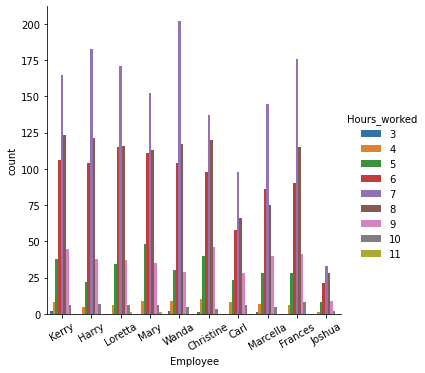

In [13]:
# run this cell
ax = sns.catplot(x="Employee", hue="Hours_worked", data=employee_data, kind = 'count')
plt.xticks(rotation = 30)
plt.show()

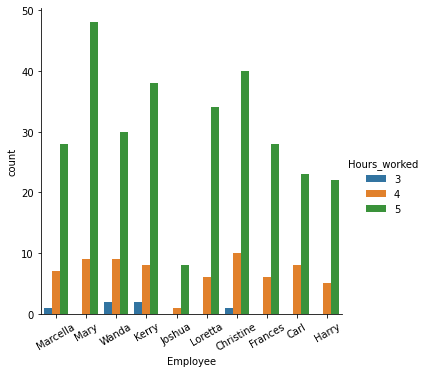

In [14]:
# your modified plot to show employees that worked 5 hours or less here


9. Let's do the same thing again, but this time to see who's working the most. Who frequently works 9 hours or more?

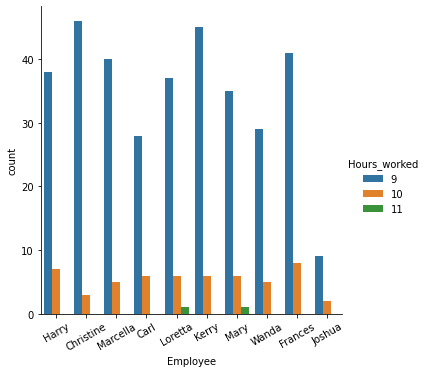

10. Two functions are provided below that isolate the month and the year from the date. Use either function or both to create a new column that contains only the respective month or year. Print the first few rows to verify.

In [16]:
# run this cell
def isolate_year(date):
    return date[:4]

def isolate_month(date):
    dt = datetime.strptime(date, "%Y-%m-%d")
    return datetime.strftime(dt, '%B')

In [17]:
# your code here
# bonus challenge: can you isolate year using a lambda function instead of the one defined above?


Employee        Date Day_of_week  Hours_worked  Wages   Tips     Month  Year
0    Kerry  2020-11-18         Wed             7  77.02  32.92  November  2020
1    Harry  2020-11-18         Wed             9  47.42  34.05  November  2020
2  Loretta  2020-11-18         Wed             8  57.25  38.91  November  2020
3     Mary  2020-11-18         Wed             7  68.23  30.03  November  2020
4    Wanda  2020-11-18         Wed             8  72.47  31.37  November  2020

11. Using either seaborn or matplotlib, pick one of your employees and make a line plot of their wages over the months for 2021.

> **Hint:** If using seaborn, this can also be done using just the query method

> **Remember:** Examples shown are just a possibility. Name choices and graphs will vary due to random selection.

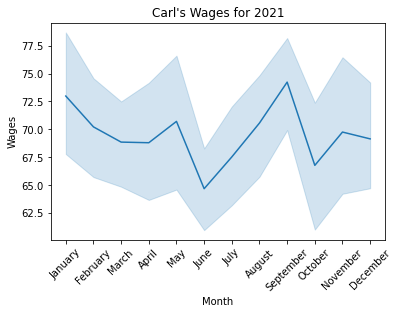

In [20]:
# shown example is seaborn

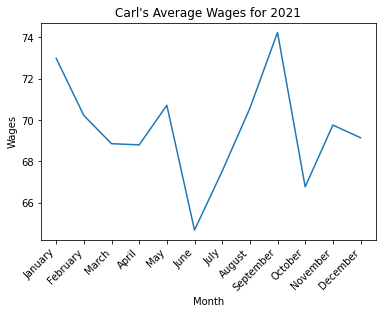

In [22]:
# shown example is matplotlib

**Bonus Questions:**

12. Create a column called `Total` that combines the `Wages` and `Tips` values. Then create another column called `Hourly_wage` that determines how much they made per hour that day.

13. What does the hourly wage distribution look like? Are there any outliers?

14. Identify who had the highest hourly wage, when it happened, and how long they worked. Create a plot showing all of their hourly wages for that month.

15. Create a plot showing who worked the most and least

16. Think of your own question you want to answer about this data. Write your question and then make a plot that provides an answer. If you're unsure how to plot it, show your answer with pandas.